## Supervised Learning - Logistics Regression

### Context

* will the customer buy the product?
* does the patient have COVID-19?
* will the equipment fail?
* what is the genre of the music?

The key difference between linear regression and logistic regression is, the former treat cause and effect to be associated by a linear (or semi - linear) relationship; however in many occassions the relationship is more of binary in nature - something that logistic regression attempts to cover

Typically, logistic regression algorithm can perform,
* Binary classification
* Multiclass classification (where one `feature` can belong to multiple classes)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Query - can we predict if a student would pass or fail an exam based on the number of hours studied? (to prove to the indian parents that it does not :-P)

Let's try if we can do this using Linear Regression...

Typical Workflow
* Import data
* Format data
* Train using fit() function
* Predict & plot
* Compute key performance indicator of the model

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

# Load data
df = pd.read_csv('Data/Grade_Set_1_Classification.csv')

df

,Hours_Studied,Result,Hours_Studied_Test,Actual
0,2,0,8,1
1,3,0,7,1
2,4,0,4,0
3,5,1,3,1
4,6,1,8,1
5,7,1,6,0
6,8,1,3,0
7,9,1,10,1
8,10,1,2,1
9,5,1,8,0


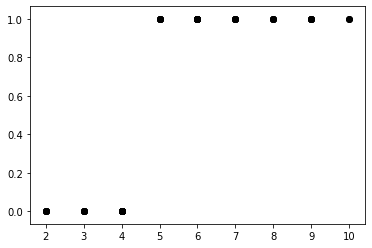

In [24]:
x= df.Hours_Studied[:, np.newaxis]      # independent variable, train record
y= df.Result                            # dependent variable, train record 
z= df.Hours_Studied_Test[:, np.newaxis] # independent variable, test record 
v= df.Actual                            # what happened in reality 

# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x, y)

# plotting fitted line
plt.scatter(x, y,  color='black')

R Squared :  -0.257135831934584
Mean Absolute Error:  0.42003660336386867
Root Mean Squared Error:  0.5463015722393636


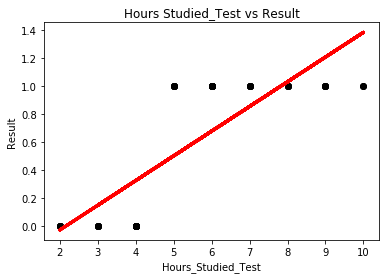

In [25]:
# plotting fitted line
plt.scatter(x, y,  color='black') # plotting between hours studied and outcome

# plotting hours studied (test) and outcome
plt.plot(z, lr.predict(z), color='red', linewidth=3)
plt.title('Hours Studied_Test vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied_Test')

# add predict value to the data frame
df['Result_Pred'] = lr.predict(z)

# Using built-in function
print ("R Squared : ", r2_score(df.Actual, df.Result_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Actual, df.Result_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Actual, df.Result_Pred)))

It is clear that the linear regression model is failing to explain the abrupt switch faithfully resulting into pathetic performance indicator values; a negative 

### Logistic Equation

Logistic regression is best explained using Odds ratio.
The odds ratio signifies the odds of an event occurring. 
